# Descrição do Experimento

Algoritmo Genético utilizando representação binária do cromossomo. O valor zero representa que o vértice não participa da solução e o valor um, por outro lado, participa.

O tamanho do cromossomo é igual ao número de vértices não obrigatórios da instância do problema considerada (dataset), ou seja, é igual o número total de vértices subtraido a quantidade de vértices terminais.

Operação de cruzamento baseada em dois pontos de corte escolhidos aleatoriamente para cada chamada do método.
Foi utilizada a operação de mutação *bit flip*.

Para todas as instâncias do problema foram utilizados os parâmetros:

    - Nro. de execuções = 30
    - Tamanho população = 100
    - Taxa de cruzamento = 0.85
    - Taxa de mutação = 0.2
    - A inicialização da população é puramente aleatória.
    
    - Critério de parada: atingir o número máximo de iterações.
        - Atingir o número máximo de iterações: 10.000
        - Estagnação: não apresenta melhora do fitness nas últimas 500 gerações.
        - Atingir o máximo global previsto.
   
Veja implementação [check_stop_criterions](https://github.com/GiliardGodoi/ppgi-steiner-tree-gpx/blob/fb1801c118c6c51b2b874c2111975f43ffa8b509/ga_binary.py#L418)

O código da simulação se refere ao seguinte [*commit*](https://github.com/GiliardGodoi/ppgi-steiner-tree-gpx/tree/fb1801c118c6c51b2b874c2111975f43ffa8b509)

As instâncias consideradas se referem aos da classe B (steinb1.txt ... steinb18.txt) da OR-Library.

In [1]:
# CONFIGURAÇÕES INICIAIS DO NOTEBOOK
import os

# Importando bibliotecas para análise de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização dos dados
from matplotlib import pyplot as plt
import seaborn as sns

## Carregando os dados

In [2]:
MAIN_FOLDER = os.path.join("..", "outputdata", "20200330_kapsalis_random")
 
# simulations_folder: diretórios que contem os dados para cada um dos datasets.
# ['B1', 'B2', 'B3' ... ]
simulations_folder = os.listdir(MAIN_FOLDER)

assert os.path.exists(MAIN_FOLDER) == True, 'Please, check MAIN_FOLDER path'
assert len(simulations_folder) == 18, "Please, check how many simulations are"

# ARQUIVO PRINCIPAL: INDICA QUAL DADOS ESTAMOS ANALISANDO.
# Cada execução (trial) gera um arquivo diferente. 
# all_files: é um array com o nome dos trinta  arquivos
all_files = ["trial_{0}_simulation.csv".format(i) for i in range(1,31)]

#all_data_pieces: contém os DataFrames para cada um dos 30 arquivos (trials) dos 18 datasets 
all_data_pieces = list()

for folder in simulations_folder:    
    for file in all_files:
        df = pd.read_csv(os.path.join(MAIN_FOLDER, folder, file))
        all_data_pieces.append(df)

# concatena (junta) todos os DataFrames em um só
df_data = pd.concat(all_data_pieces, ignore_index=True)
        
del all_data_pieces
del df

df_data.head()

,nro_trial,instance_problem,nro_nodes,nro_edges,nro_terminals,tx_crossover,tx_mutation,global_optimum,best_cost,best_fitness,population_size,max_generation,iterations,run_time,max_last_improvement,why_stopped
0,1,B1,50,63,9,0.85,0.2,82,85,410,100,10000,741,66.162495,500,stagnation
1,2,B1,50,63,9,0.85,0.2,82,84,291,100,10000,959,60.729615,500,stagnation
2,3,B1,50,63,9,0.85,0.2,82,83,308,100,10000,1339,76.604051,500,stagnation
3,4,B1,50,63,9,0.85,0.2,82,85,203,100,10000,1528,85.964846,500,stagnation
4,5,B1,50,63,9,0.85,0.2,82,82,218,100,10000,498,29.327297,500,global_optimum_reached


In [3]:
# Algumas funções da biblioteca seaborn (sns) possui um parâmetro para determinarmos a ordem que 
# atributos categóricos serão plotados em um dos exios (x ou y) do gráfico
# categorial_order é para garantir que os dados serão plotados na mesma ordem
# [B1, B2, B3, ... B17, B18]

# Sem esse parâmetro os dados seriam plotados na ordem alfabética das strings do atributo instance_problem
# [B1, B11, B12 ... B17, B18, B2, B3, ... B9 ] o que não é desejável.

categorical_order = ["B{0}".format(i) for i in range(1,19)]

## Análise Exploratória dos dados: simulation.csv

A análise realizada aqui se refere aos dados do arquivo `trial_{0}_simulation.csv`


### Variação do melhor custo atingido (best_cost)

In [4]:
df = df_data[["instance_problem", "best_cost"]].groupby("instance_problem").describe()

df.loc[categorical_order]

best_cost                                              \
                     count        mean       std    min     25%    50%   
instance_problem                                                         
B1                    30.0   84.533333  2.129163   82.0   83.00   85.0   
B2                    30.0   84.166667  2.379269   83.0   83.00   83.0   
B3                    30.0  138.000000  0.000000  138.0  138.00  138.0   
B4                    30.0   63.400000  1.940494   59.0   63.00   63.5   
B5                    30.0   61.933333  0.739680   61.0   61.25   62.0   
B6                    30.0  122.133333  0.507416  122.0  122.00  122.0   
B7                    30.0  126.766667  7.290444  115.0  122.00  127.0   
B8                    30.0  108.600000  2.823546  104.0  107.00  108.5   
B9                    30.0  220.633333  0.999425  220.0  220.00  220.0   
B10                   30.0   95.433333  4.446489   86.0   93.25   95.0   
B11                   30.0   97.366667  2.999808   91.0   95.00   97.0   
B12                   30.0  174.100000  0.305129  174.0  174.00  174.0   
B13                   30.0  193.133333  7.864075  181.0  186.25  193.0   
B14                   30.0  244.833333  3.742425  240.0  242.00  243.5   
B15                   30.0  321.900000  2.249138  318.0  320.00  322.0   
B16                   30.0  150.000000  6.685032  135.0  148.00  149.0   
B17                   30.0  137.166667  2.865771  132.0  135.00  136.0   
B18                   30.0  218.766667  0.568321  218.0  218.00  219.0   

                                 
                     75%    max  
instance_problem                 
B1                 85.75   91.0  
B2                 83.00   92.0  
B3                138.00  138.0  
B4                 64.00   67.0  
B5                 62.00   64.0  
B6                122.00  124.0  
B7                130.00  150.0  
B8                109.75  116.0  
B9                221.00  224.0  
B10                97.75  112.0  
B11                99.75  103.0  
B12               174.00  175.0  
B13               196.75  212.0  
B14               247.75  253.0  
B15               323.75  327.0  
B16               153.75  167.0  
B17               139.00  144.0  
B18               219.00  220.0

In [5]:
df = df_data[["instance_problem", "iterations"]].groupby("instance_problem").describe()
df.loc[categorical_order]

iterations                                                   \
                      count         mean         std    min      25%     50%   
instance_problem                                                               
B1                     30.0  1116.333333  446.472638  239.0   826.75  1073.0   
B2                     30.0   738.133333  286.651505  231.0   587.50   702.5   
B3                     30.0    84.666667   49.979536   29.0    55.25    69.5   
B4                     30.0  1008.900000  350.961079  636.0   738.25   874.5   
B5                     30.0   753.500000  251.762580  122.0   583.25   745.5   
B6                     30.0   278.333333  201.359232   20.0   128.00   219.0   
B7                     30.0  1364.366667  399.665505  709.0  1067.75  1252.0   
B8                     30.0  1203.200000  327.587461  710.0  1001.25  1159.0   
B9                     30.0   606.600000  305.108415  130.0   370.50   610.0   
B10                    30.0  1180.466667  301.095441  597.0   936.25  1192.0   
B11                    30.0  1139.600000  385.510910  743.0   843.50   963.0   
B12                    30.0   407.733333  220.470333   91.0   231.25   385.0   
B13                    30.0  1505.000000  409.119070  830.0  1224.25  1506.5   
B14                    30.0  1449.300000  348.639835  831.0  1271.75  1413.5   
B15                    30.0  1227.766667  357.442803  649.0   963.25  1214.5   
B16                    30.0  1461.900000  383.803322  905.0  1201.50  1405.0   
B17                    30.0  1331.033333  297.289535  899.0  1121.25  1290.0   
B18                    30.0   753.433333  234.972146  200.0   640.25   786.0   

                                   
                      75%     max  
instance_problem                   
B1                1373.00  2015.0  
B2                 985.50  1211.0  
B3                  88.50   234.0  
B4                1136.75  1865.0  
B5                 957.50  1222.0  
B6                 424.00   746.0  
B7                1644.50  2539.0  
B8                1340.50  2019.0  
B9                 817.50  1280.0  
B10               1389.00  1753.0  
B11               1352.75  2055.0  
B12                538.75   942.0  
B13               1743.50  2459.0  
B14               1600.00  2546.0  
B15               1393.75  2093.0  
B16               1713.00  2348.0  
B17               1521.00  1956.0  
B18                848.75  1155.0

In [6]:
# fig = plt.figure(figsize=(20, 10))
# sns.set(style="whitegrid")

# sns.barplot(x="instance_problem",
#             y="best_cost",
#             order=categorical_order,
#             data=df_data)

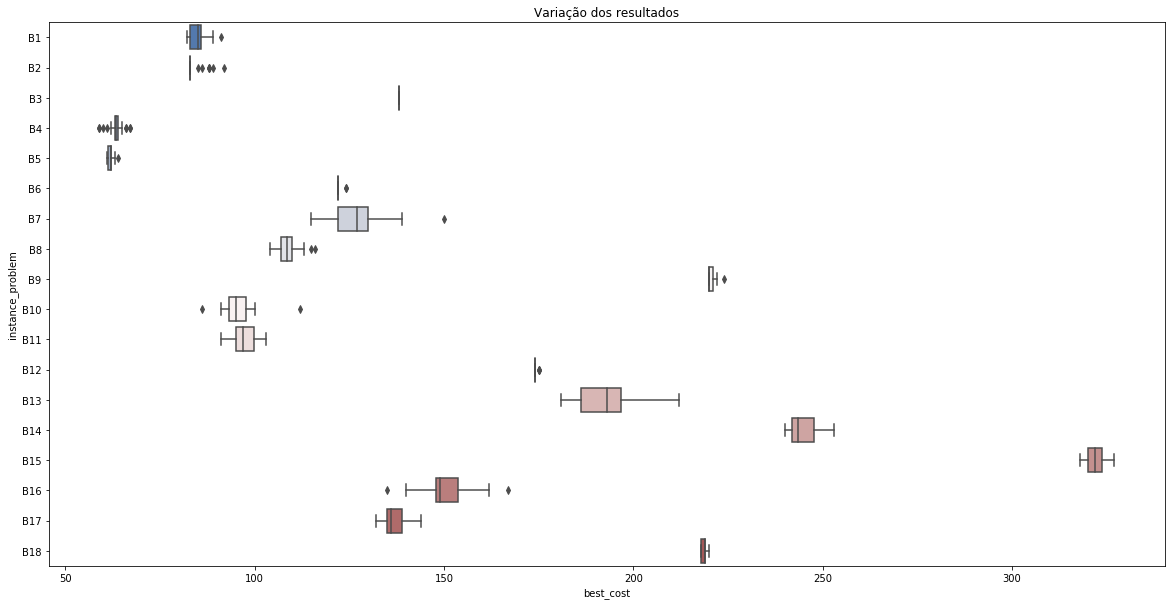

In [7]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação dos resultados')
# sns.set(style="darkgrid")

sns.boxplot(x="best_cost", 
            y="instance_problem",
            data=df_data,
            order=categorical_order,
            palette="vlag",
           )

# sns.swarmplot(x="best_cost", 
#               y="instance_problem",
#               data=df_data,
#               order=categorical_order,
#               size=2,
#               color=".3",
#               linewidth=0
#              )

<Figure size 1440x720 with 0 Axes>

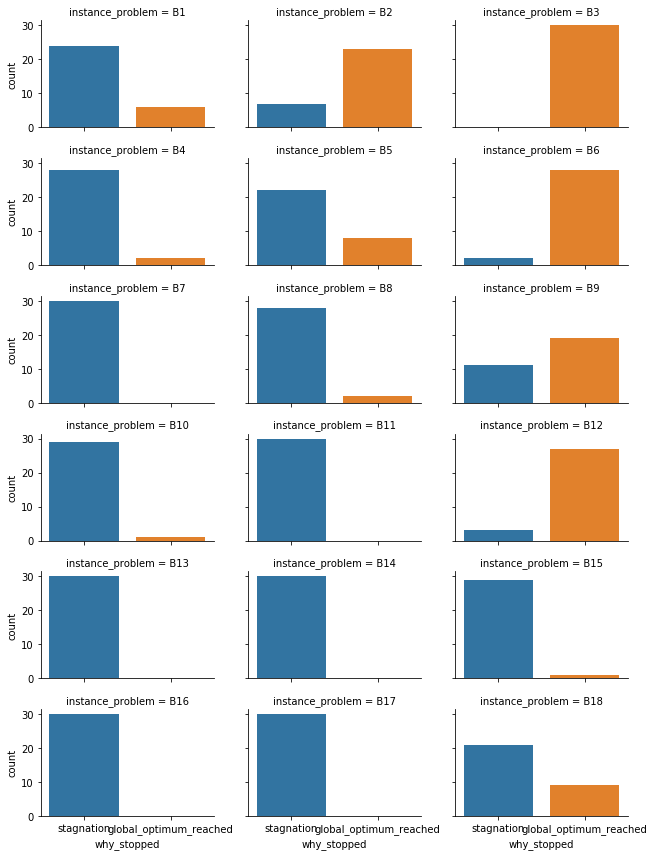

In [8]:
fig = plt.figure(figsize=(20, 10))

grid = sns.catplot("why_stopped", 
                   col="instance_problem",
                   col_wrap=3,
                   data=df_data,
                   kind="count",
                   col_order=categorical_order,
                   height=2,
                   aspect=1.5)

In [9]:
# fig = plt.figure(figsize=(20, 10))

# grid = sns.catplot("best_cost",
#                    "why_stopped",
#                    col="instance_problem",
#                    col_wrap=3,
#                    data=df_data,
#                    kind="box",
#                    col_order=categorical_order,
#                    height=2,
#                    aspect=1.5,
#                    sharex=False
#                   )

In [10]:
# Variação das iterações.

# fig = plt.figure(figsize=(20, 10))
# sns.set(style="whitegrid")

# sns.barplot(x="instance_problem",
#             y="iterations",
#             color="steelblue",
#             order=categorical_order,
#             data=df_data)

In [11]:
df_data["why_stopped"].value_counts()

stagnation                384
global_optimum_reached    156
Name: why_stopped, dtype: int64

In [12]:
# Definir uma coluna para calcular a frequência relativa
df_data["freq"] = 0

# 1. Selecionar as colunas de interesse somente.
# 2. Os atributos (colunas) se referem a variáveis categóricas.
# 3. Realizamos uma operação de agregação (groupby) e então uma contagem
# Essa contagem será armazenada na coluna 'freq' - temos a frequência absoluta
df = df_data[["instance_problem", "why_stopped", "freq"]].groupby(["instance_problem", "why_stopped"]).count()

# A frequência relativa pode ser calculada da sequinte maneira.
# 30 se refere ao número de execuções (trial). round é utilizado para arrendondar o valor
df["freq"] = round((df["freq"] / 30) * 100, ndigits=2)

# A operação de agregação (groupby) transforma as colunas 'instance_problem' e 'why_stopped'
# em indices. Vamos desfazer isso para redimensionar a tabela
df = df.reset_index()

# A tabela resultante possui o formato
# ["instance_problem", "why_stopped", "freq"]
# df.head()

# 
df_stopped = df.pivot(index="instance_problem", 
                     columns="why_stopped",
                     values="freq"
                    )
# Algumas instâncias do problema obtiveram 100% dos trials
# para um determinado critério de parada. O outro valor foi definido como NaN
# vamos substituir NaN por 0
df_stopped.fillna(0, inplace=True)

# Apresentando os dados
# <utilizar categorical_order para apresentar os dados segundo a ordem desejada.
df_stopped.loc[categorical_order]

why_stopped,global_optimum_reached,stagnation
instance_problem,,
B1,20.00,80.00
B2,76.67,23.33
B3,100.00,0.00
B4,6.67,93.33
B5,26.67,73.33
B6,93.33,6.67
B7,0.00,100.00
B8,6.67,93.33
B9,63.33,36.67


In [13]:
# Analisando o número de iterações para as execuções que terminaram por estagnação.

df_data["why_stopped"].unique()

array(['stagnation', 'global_optimum_reached'], dtype=object)

In [14]:
# Selecionando os registros de interesse
df_stagnation = df_data[df_data["why_stopped"] == "stagnation" ]

df_stagnation.columns

Index(['nro_trial', 'instance_problem', 'nro_nodes', 'nro_edges',
       'nro_terminals', 'tx_crossover', 'tx_mutation', 'global_optimum',
       'best_cost', 'best_fitness', 'population_size', 'max_generation',
       'iterations', 'run_time', 'max_last_improvement', 'why_stopped',
       'freq'],
      dtype='object')

In [15]:
df = df_stagnation[["instance_problem", "iterations"]].groupby("instance_problem").describe()

# A instância B3 atingiu o máximo global em todas as execuções.
# então essa instância não irá aparecer aqui em df.
# para evitar o erro e ordenar é necessário fazer essa gambiarra
x = categorical_order[:]
x.remove("B3")

df.loc[x]

iterations                                                   \
                      count         mean         std    min      25%     50%   
instance_problem                                                               
B1                     24.0  1200.958333  348.353329  682.0   949.00  1198.5   
B2                      7.0   904.571429  147.275091  702.0   804.00   941.0   
B4                     28.0  1010.035714  363.552786  636.0   735.50   866.5   
B5                     22.0   842.045455  195.579354  557.0   696.00   800.5   
B6                      2.0   628.500000   21.920310  613.0   620.75   628.5   
B7                     30.0  1364.366667  399.665505  709.0  1067.75  1252.0   
B8                     28.0  1234.857143  315.417385  843.0  1022.25  1174.0   
B9                     11.0   863.181818  204.220380  575.0   763.00   824.0   
B10                    29.0  1165.620690  295.039031  597.0   936.00  1181.0   
B11                    30.0  1139.600000  385.510910  743.0   843.50   963.0   
B12                     3.0   745.333333  186.915311  570.0   647.00   724.0   
B13                    30.0  1505.000000  409.119070  830.0  1224.25  1506.5   
B14                    30.0  1449.300000  348.639835  831.0  1271.75  1413.5   
B15                    29.0  1245.310345  350.378683  649.0   991.00  1235.0   
B16                    30.0  1461.900000  383.803322  905.0  1201.50  1405.0   
B17                    30.0  1331.033333  297.289535  899.0  1121.25  1290.0   
B18                    21.0   846.666667  178.290867  574.0   683.00   815.0   

                                   
                      75%     max  
instance_problem                   
B1                1389.25  1970.0  
B2                1014.00  1053.0  
B4                1177.00  1865.0  
B5                 981.75  1222.0  
B6                 636.25   644.0  
B7                1644.50  2539.0  
B8                1366.50  2019.0  
B9                 970.00  1280.0  
B10               1362.00  1753.0  
B11               1352.75  2055.0  
B12                833.00   942.0  
B13               1743.50  2459.0  
B14               1600.00  2546.0  
B15               1395.00  2093.0  
B16               1713.00  2348.0  
B17               1521.00  1956.0  
B18               1010.00  1155.0

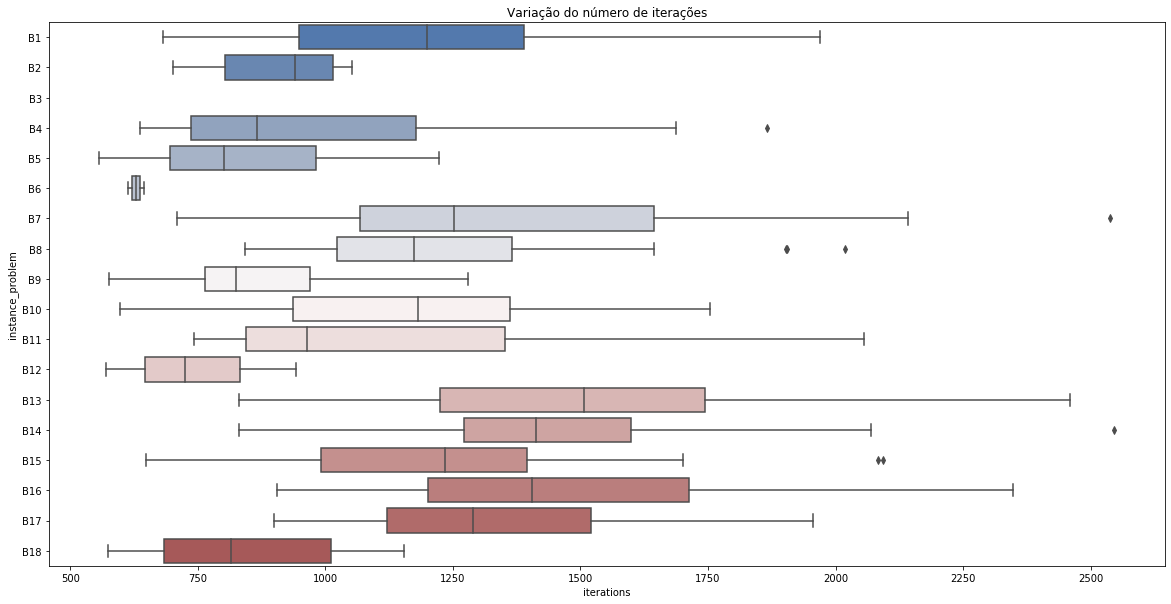

In [16]:

fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do número de iterações')
# sns.set(style="darkgrid")

sns.boxplot(x="iterations", 
            y="instance_problem",
            data=df_stagnation,
            order=categorical_order,
            palette="vlag",
           )

# sns.swarmplot(x="iterations", 
#               y="instance_problem",
#               data=df_stagnation,
#               order=categorical_order,
#               size=2,
#               color=".5",
#               linewidth=0
#              )

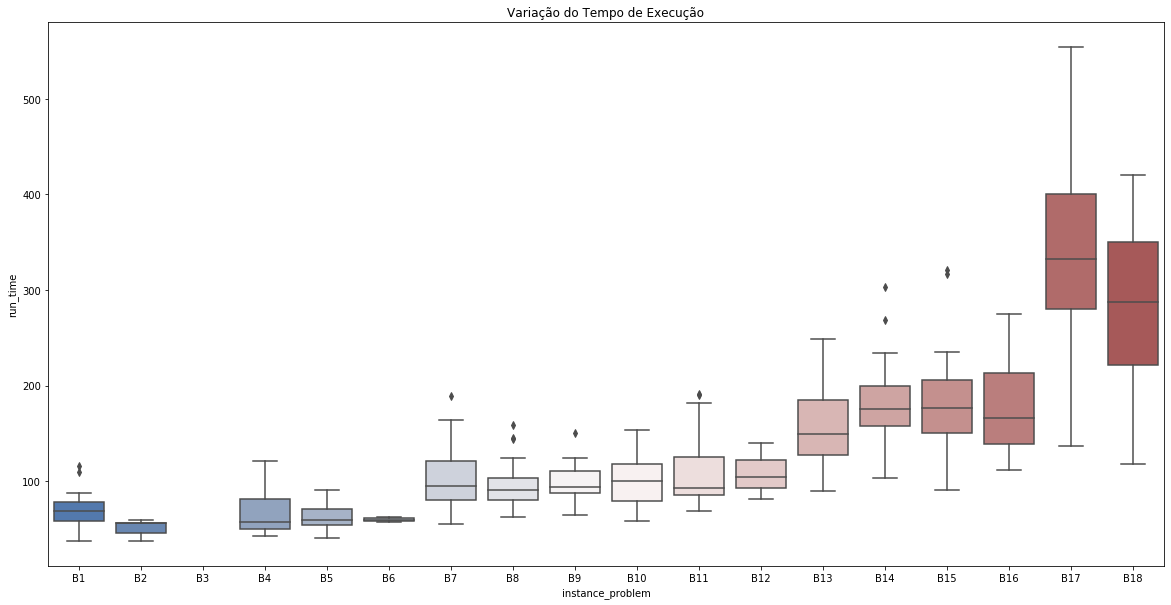

In [17]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do Tempo de Execução')
# sns.set(style="darkgrid")

sns.boxplot(y="run_time", 
            x="instance_problem",
            data=df_stagnation,
            order=categorical_order,
            palette="vlag",
           )

# sns.swarmplot(y="run_time", 
#               x="instance_problem",
#               data=df_stagnation,
#               order=categorical_order,
#               size=2,
#               color="1",
#               linewidth=0
#              )

### Analizando o desempenho a cada iteração.

O arquivo `trial_{0}_evaluation.csv` mantém alguns dados de interesse para cada iteração de uma execução do algoritmo genético.

Os atributos são:
   - **iteration**: número da iteração;
   - **penalization**: quantidade de indivíduos que sofreram penalização - não mantém a média ou quantidade de penalizações.
   - **average**: fitness médio percebido durante a iteração;
   - **std_deviation**: desvio padrão do fitness na iteração.
    


In [18]:
DATASET = "B13"

all_files = ["trial_{0}_evaluation.csv".format(i) for i in range(1,31)]
all_data_pieces = list()

for trial, filename in enumerate(all_files, start=1):
    df = pd.read_csv(os.path.join(MAIN_FOLDER, DATASET, filename))
    df['trial'] = str(trial)
    all_data_pieces.append(df)
    
df_evaluation = pd.concat(all_data_pieces)

del all_data_pieces
del df

df_evaluation.sample(5)

,iteration,penalization,average,std_deviation,trial
736,736,17,184.36,40.785351,5
832,832,14,266.29,43.995935,14
865,865,8,99.71,27.617625,13
952,952,11,251.28,46.756857,4
1742,1742,17,181.52,39.486983,24


In [19]:
df_evaluation['penalization'].describe()

count    45180.000000
mean        15.432758
std         12.950955
min          0.000000
25%          9.000000
50%         13.000000
75%         18.000000
max        100.000000
Name: penalization, dtype: float64

In [20]:
df_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45180 entries, 0 to 1491
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   iteration      45180 non-null  int64  
 1   penalization   45180 non-null  int64  
 2   average        45180 non-null  float64
 3   std_deviation  45180 non-null  float64
 4   trial          45180 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ MB


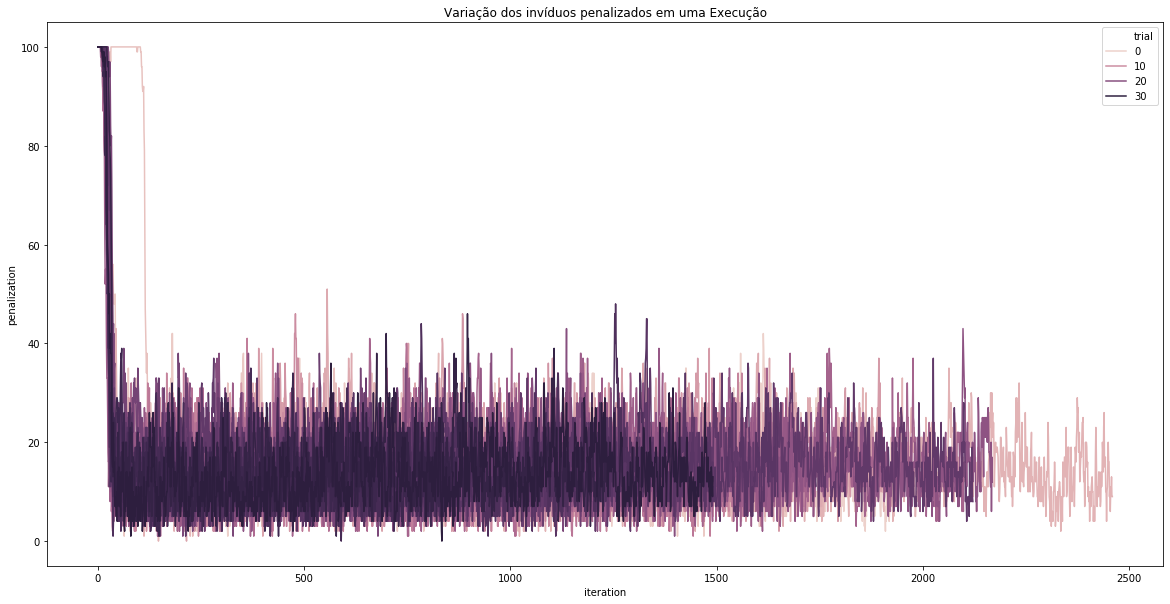

In [21]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação dos invíduos penalizados em uma Execução')

g = sns.lineplot(x="iteration",
                y="penalization",
                hue='trial',
                data=df_evaluation)

### Exemplo da variação de indivíduos penalizados em uma execução


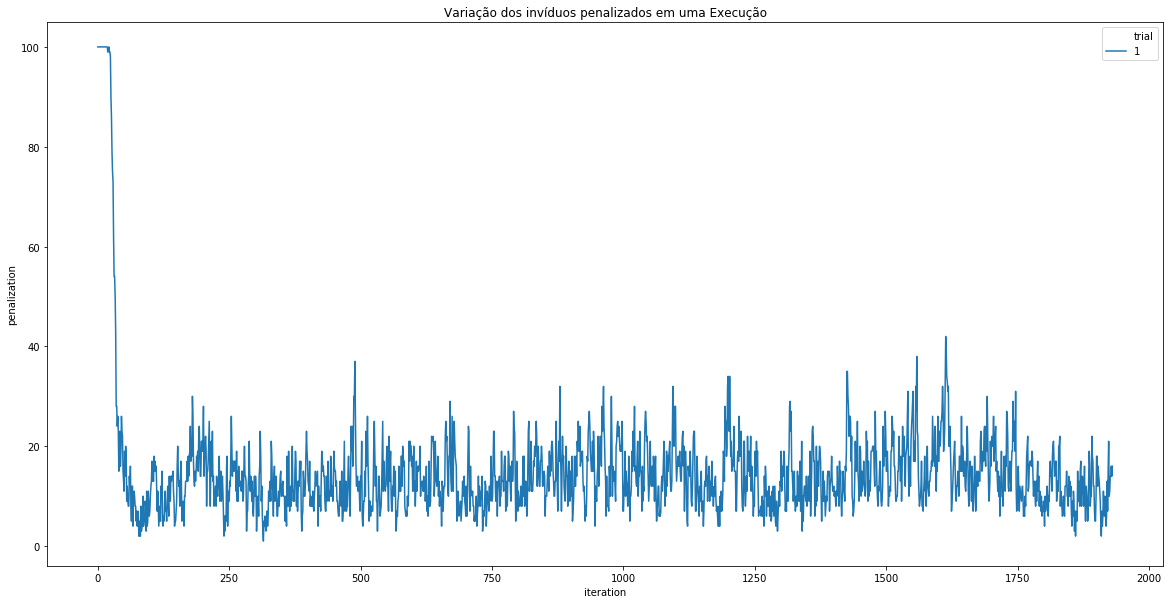

In [27]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação dos invíduos penalizados em uma Execução')

g = sns.lineplot(x="iteration",
                y="penalization",
                hue='trial',
                data=df_evaluation[df_evaluation["trial"] == '1'])

In [23]:
# fig = plt.figure(figsize=(20, 10))
# plt.title(label=f'Variação do Tempo de Execução')
# # sns.set(style="darkgrid")

# sns.boxplot(x="iteration",
#             y="penalization",
#             data=df_evaluation,
#             palette="vlag",
#            )

In [25]:
df_evaluation.head()

,iteration,penalization,average,std_deviation,trial
0,0,100,822.05,351.275666,1
1,1,100,779.30,324.946787,1
2,2,100,840.59,310.807456,1
3,3,100,998.40,280.283082,1
4,4,100,559.99,236.403374,1


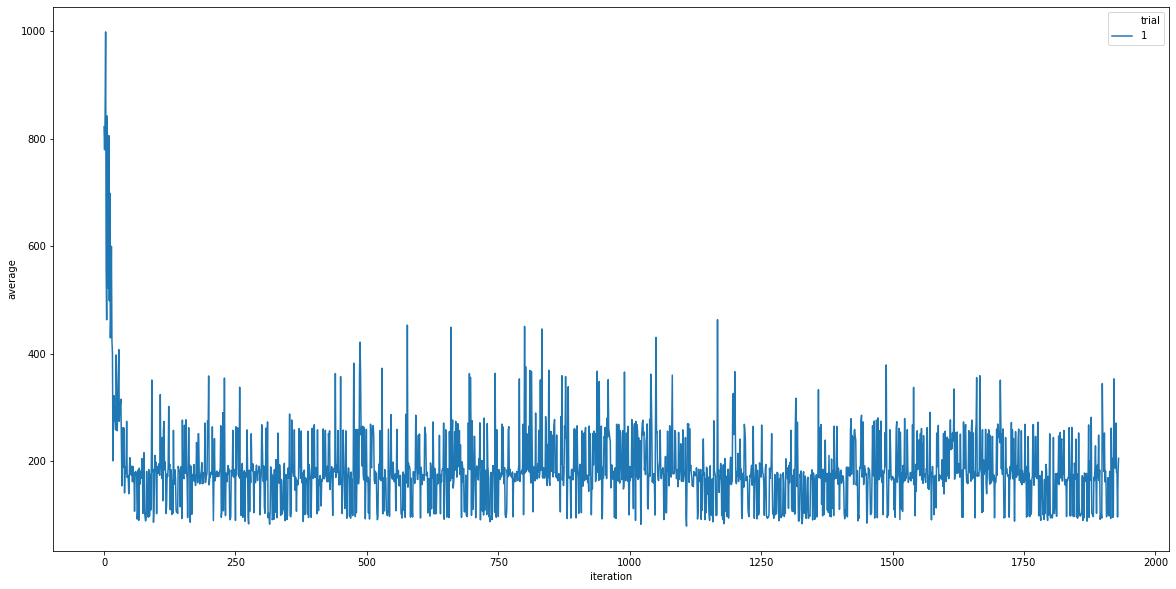

In [28]:
fig = plt.figure(figsize=(20, 10))
# plt.title(label=f'Variação dos invíduos penalizados em uma Execução')

g = sns.lineplot(x="iteration",
                y="average",
                hue='trial',
                data=df_evaluation[df_evaluation["trial"] == '1'])

### Melhor resultado de cada iteração


In [36]:
DATASET = "B13"

all_files = ["trial_{0}_best_from_round.csv".format(i) for i in range(1,31)]

all_data_pieces = list()

for trial, filename in enumerate(all_files, start=1):
    df = pd.read_csv(os.path.join(MAIN_FOLDER, DATASET, filename))
    df['trial'] = str(trial)
    all_data_pieces.append(df)
    
df_best_each_round = pd.concat(all_data_pieces)

del all_data_pieces
del df

df_best_each_round.sample(5)

,iteration,cost,fitness,trial
422,422,230,389,7
220,220,237,226,1
912,912,209,203,17
1499,1499,212,210,1
1774,1774,210,223,1


In [37]:
trial_order = [str(i) for i in range(1,31)]

df = df_best_each_round[["trial", "cost"]].groupby("trial").describe()

df.loc[trial_order]

cost                                                            
        count        mean        std    min    25%    50%     75%     max
trial                                                                    
1      1931.0  226.894355  49.210631  198.0  212.0  217.0  225.50   934.0
2      1756.0  219.768793  51.718569  184.0  201.0  207.0  220.00  1027.0
3      1084.0  231.133764  66.316399  192.0  206.0  212.0  220.00   999.0
4      1164.0  222.520619  58.221805  193.0  202.0  212.0  224.00  1117.0
5      2460.0  217.915447  47.158237  186.0  200.0  207.0  219.00   945.0
6      1767.0  226.690436  52.682061  186.0  203.0  221.0  232.00   977.0
7      1523.0  231.696651  46.906328  193.0  211.0  223.0  235.00   945.0
8      1903.0  229.163426  50.558844  187.0  210.0  219.0  230.00  1067.0
9      1256.0  244.689490  43.034008  212.0  229.0  235.0  244.00   818.0
10     1223.0  225.372854  64.840431  195.0  206.0  212.0  221.50  1052.0
11     1641.0  218.419866  60.385357  184.0  199.0  205.0  215.00  1165.0
12     1566.0  231.046616  47.709194  193.0  209.0  216.0  239.00  1063.0
13     1551.0  222.936815  53.294930  194.0  205.0  212.0  220.00  1079.0
14     1232.0  237.510552  53.948466  206.0  219.0  229.0  237.00  1054.0
15     1200.0  242.825000  46.582804  212.0  226.0  233.0  247.00   889.0
16     2103.0  227.144555  38.650167  194.0  211.0  218.0  232.00   889.0
17     1696.0  226.077241  36.592558  184.0  208.0  218.0  243.00   822.0
18     1710.0  230.443860  49.103538  192.0  205.0  217.0  248.75   894.0
19     2169.0  223.716920  50.018826  186.0  201.0  221.0  232.00  1156.0
20     1436.0  223.005571  46.146864  187.0  201.0  214.0  237.00   992.0
21     1200.0  232.674167  55.102086  197.0  208.0  216.0  236.00  1015.0
22      846.0  244.517730  74.982769  201.0  216.0  220.0  254.00  1006.0
23     1243.0  239.552695  73.019847  193.0  205.0  216.0  253.50  1189.0
24     2122.0  220.808671  44.638779  186.0  203.0  212.0  227.00   899.0
25     1649.0  218.896301  49.932632  181.0  202.0  209.0  222.00   859.0
26     1323.0  225.904762  52.052560  196.0  207.0  215.0  223.00  1005.0
27      831.0  222.653430  58.257738  201.0  210.0  214.0  217.00  1032.0
28      871.0  230.084960  48.364323  200.0  211.0  215.0  225.50   807.0
29     1232.0  230.010552  74.245782  190.0  200.0  204.5  236.00  1053.0
30     1492.0  227.976542  48.171643  191.0  207.0  217.0  235.00   953.0

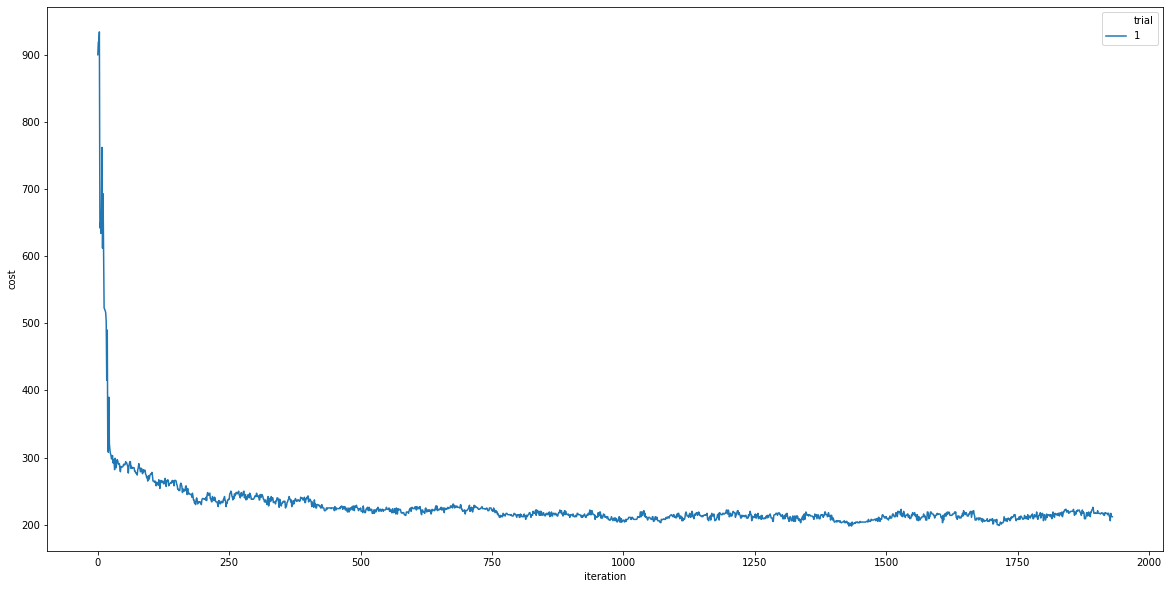

In [38]:
fig = plt.figure(figsize=(20, 10))
# plt.title(label=f'Variação dos invíduos penalizados em uma Execução')

g = sns.lineplot(x="iteration",
                y="cost",
                hue='trial',
                data=df_best_each_round[df_best_each_round["trial"] == '1'])

In [39]:
df = df_best_each_round[["trial", "fitness"]].groupby("trial").describe()

df.loc[trial_order]

fitness                                                              
        count        mean         std    min     25%    50%     75%     max
trial                                                                      
1      1931.0  224.517349  111.824340  105.0  192.00  210.0  229.00  1799.0
2      1756.0  215.612756  138.417830  102.0  139.00  205.0  224.00  2091.0
3      1084.0  241.255535  151.463791  112.0  199.00  214.5  282.00  1934.0
4      1164.0  223.362543  145.485663   96.0  183.75  209.0  225.00  2005.0
5      2460.0  223.218293  108.814051   49.0  192.00  210.5  230.00  1988.0
6      1767.0  243.261460  130.448028  108.0  201.00  217.0  288.00  1707.0
7      1523.0  252.011162  137.677180   39.0  202.00  219.0  293.00  1913.0
8      1903.0  236.996847  130.557774  105.0  196.00  214.0  284.50  2092.0
9      1256.0  238.310510  150.760159  112.0  196.00  213.0  245.00  2202.0
10     1223.0  233.198692  161.220850  106.0  190.00  209.0  233.00  2055.0
11     1641.0  224.524071  134.077288  106.0  190.00  210.0  228.00  1830.0
12     1566.0  221.881865  130.635427  109.0  161.25  208.0  231.00  2036.0
13     1551.0  217.349452  130.375019   86.0  171.50  206.0  224.00  1805.0
14     1232.0  235.724838  139.123926  104.0  197.00  213.0  278.00  1990.0
15     1200.0  222.504167  146.162459  102.0  140.00  205.0  228.25  2296.0
16     2103.0  230.988588  120.368195   95.0  197.00  213.0  250.50  1906.0
17     1696.0  230.215212  135.058122  106.0  190.00  210.5  278.00  2006.0
18     1710.0  237.747368  134.679532  101.0  199.00  213.0  283.00  2107.0
19     2169.0  225.233287  121.675852  107.0  190.00  209.0  231.00  1753.0
20     1436.0  231.876045  137.489633  108.0  191.00  210.0  240.00  2238.0
21     1200.0  223.810000  133.826088  110.0  181.00  209.0  229.00  1888.0
22      846.0  273.780142  178.398401  112.0  202.00  226.0  302.00  2142.0
23     1243.0  246.725664  154.294831  107.0  198.00  215.0  286.50  2026.0
24     2122.0  242.881244  122.451927  110.0  202.25  218.0  291.00  2043.0
25     1649.0  211.710734  129.184064   94.0  138.00  204.0  221.00  1935.0
26     1323.0  223.304611  153.079529  100.0  137.00  206.0  238.00  2414.0
27      831.0  227.920578  172.612006   41.0  182.00  207.0  224.00  1793.0
28      871.0  233.879449  147.995745  103.0  190.00  210.0  234.00  2047.0
29     1232.0  242.060877  142.612227  109.0  198.00  214.0  285.00  2217.0
30     1492.0  230.977882  118.751645   46.0  197.00  213.0  241.00  1772.0

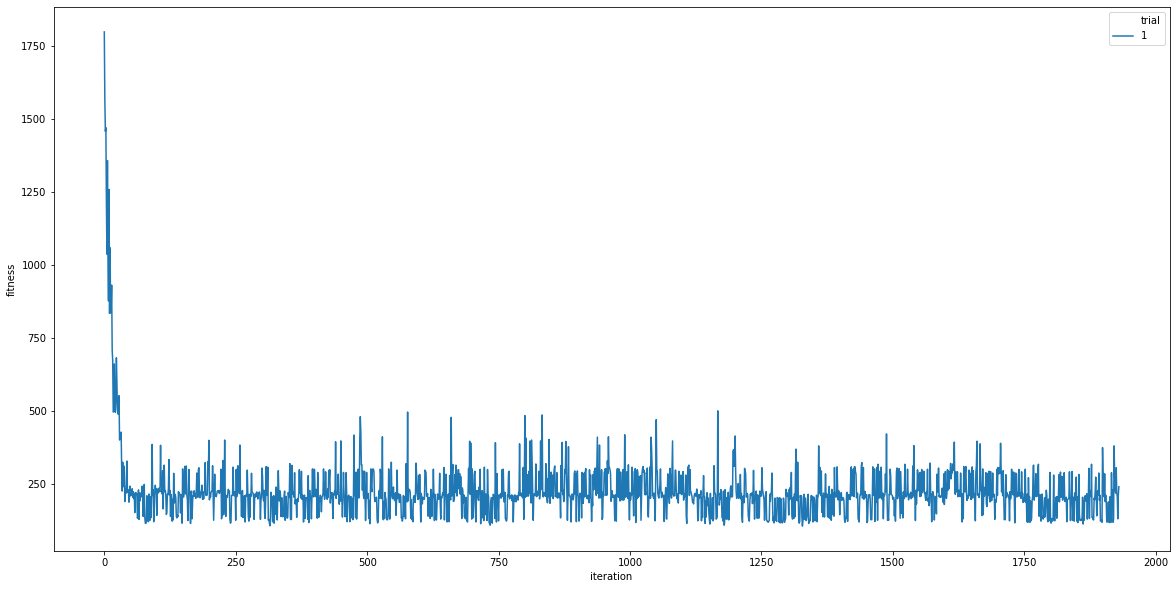

In [40]:
fig = plt.figure(figsize=(20, 10))
# plt.title(label=f'Variação dos invíduos penalizados em uma Execução')

g = sns.lineplot(x="iteration",
                y="fitness",
                hue='trial',
                data=df_best_each_round[df_best_each_round["trial"] == '1'])

### Atualização melhor fitness

In [42]:
DATASET = "B13"

all_files = ["trial_{0}_best_fitness.csv".format(i) for i in range(1,31)]

all_data_pieces = list()

for trial, filename in enumerate(all_files, start=1):
    df = pd.read_csv(os.path.join(MAIN_FOLDER, DATASET, filename))
    df['trial'] = str(trial)
    all_data_pieces.append(df)
    
df_bestfit = pd.concat(all_data_pieces)

del all_data_pieces
del df

df_bestfit.sample(5)

,iteration,cost,fitness,trial
14,65,283,208,9
19,81,267,161,26
13,25,296,520,20
21,89,263,115,19
3,7,625,1489,22


In [51]:
df = df_bestfit[['iteration', 'cost']].groupby('iteration').describe()

df

cost                                                               
          count        mean         std    min     25%    50%      75%     max
iteration                                                                     
0          30.0  958.800000  122.241254  720.0  890.25  959.0  1049.00  1189.0
1          22.0  867.545455  140.937922  600.0  751.25  891.5   949.75  1109.0
2          18.0  801.944444  131.470181  537.0  723.25  808.0   905.25  1031.0
3          19.0  750.526316  121.262969  505.0  676.00  731.0   825.50   958.0
4          18.0  707.500000  113.735633  538.0  622.25  695.0   778.50   934.0
...         ...         ...         ...    ...     ...    ...      ...     ...
1601        1.0  194.000000         NaN  194.0  194.00  194.0   194.00   194.0
1602        1.0  187.000000         NaN  187.0  187.00  187.0   187.00   187.0
1620        1.0  186.000000         NaN  186.0  186.00  186.0   186.00   186.0
1667        1.0  186.000000         NaN  186.0  186.00  186.0   186.00   186.0
1958        1.0  186.000000         NaN  186.0  186.00  186.0   186.00   186.0

[632 rows x 8 columns]

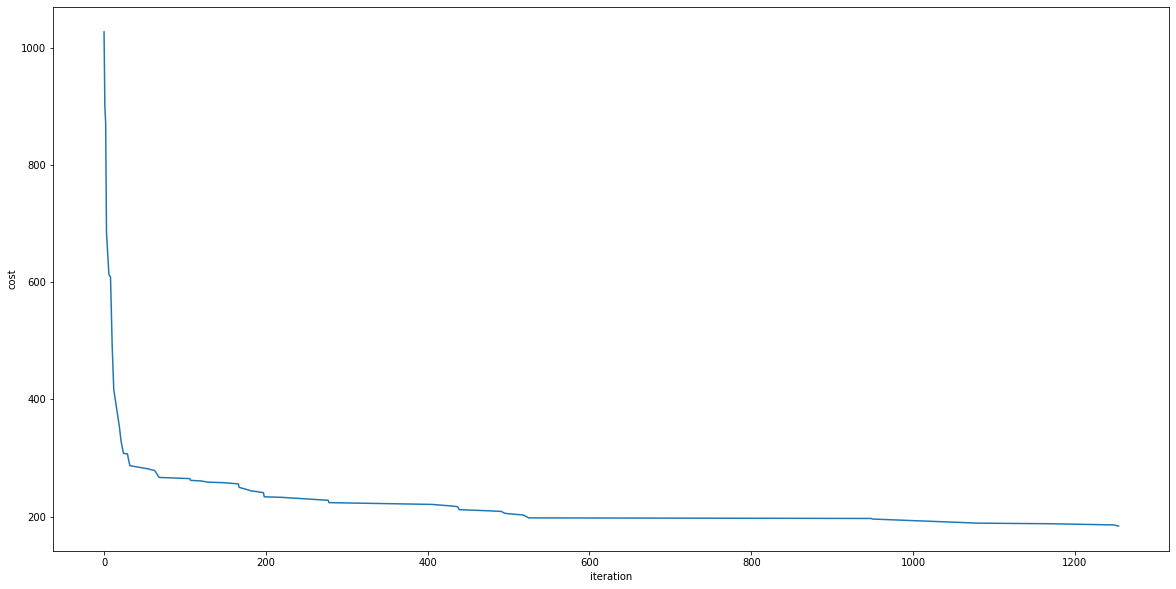

In [46]:
fig = plt.figure(figsize=(20, 10))
# plt.title(label=f'Variação dos invíduos penalizados em uma Execução')

g = sns.lineplot(x="iteration",
                y="cost",
                data=df_bestfit[df_bestfit["trial"] == '2'])